In [1]:
# Importamos las librerías
from __future__ import absolute_import, division, print_function

import re
import string 

import nltk
import hdbscan
from joblib import Memory
import numpy as np
import pandas as pd
import seaborn as sns

from unidecode import unidecode
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs
# from sklearn.feature__extraction.text import CountVectorizer


import sklearn.datasets as data
import gensim.models.word2vec as w2v
import matplotlib.pyplot as plt

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\olive\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Ruta del archivo CSV local
ruta_csv = "PARTIDAA.csv"

data = pd.read_csv(ruta_csv, encoding="latin1")

data.head()


,Nombre,Fecha,Texto
0,Director,"20/01/2021, 09:53",Los avatares de la vida os llevaron a todos a ...
1,Soren Ojoagudo,"21/01/2021, 11:53",De vez en cuando Soren se preguntaba qué demon...
2,Orsik Barbarroble,"21/01/2021, 13:24","Orsik siempre ha conocido la guerra, su padre ..."
3,Groac'h de fromma,"21/01/2021, 17:05",Groac'h era un enviado de su Sinagoga para par...
4,Gulgram Stonefist,"21/01/2021, 18:17",Justicia. Al final todo va en una misma direcc...


In [3]:

data["Texto"] = data["Texto"].astype(str)

# Ponemos en minúsculas
data["texto_limpio"] = data["Texto"].str.lower()
# Eliminamos acentos y otros símbolos
data["texto_limpio"] = data["texto_limpio"].apply(unidecode)
# Eliminamos números
data["texto_limpio"] = data["texto_limpio"].apply(lambda x: re.sub(r"\d+", " ", x))

In [4]:
# Eliminamos signos de puntuación
data["texto_limpio"] = data["texto_limpio"].str.translate(
    str.maketrans(string.punctuation, " " * len(string.punctuation))
)

In [5]:
# Eliminamos espacios innecesarios
data["texto_limpio"] = (
    data["texto_limpio"].str.replace(r"\s{2,}", " ", regex=True).str.strip()
)

In [6]:
# Eliminamos las stopwords
stop = stopwords.words("spanish")
data["texto_limpio"] = data["texto_limpio"].apply(
    lambda x: " ".join([word for word in x.split() if word not in (stop)])
)



In [7]:
print(data["texto_limpio"].head())

0    avatares vida llevaron combatir invasiones hum...
1    vez soren preguntaba demonios hacia alli pract...
2    orsik siempre conocido guerra padre buen guerr...
3    groac h enviado sinagoga participar guerra ini...
4    justicia final va misma direccion gulgram echo...
Name: texto_limpio, dtype: object


In [8]:
tokensrol = [list(texto.split()) for texto in data['texto_limpio']]

print(tokensrol)

[['avatares', 'vida', 'llevaron', 'combatir', 'invasiones', 'humanoides', 'montanas', 'lortmils', 'teniais', 'propias', 'motivaciones', 'enrolaros', 'diferentes', 'batallones', 'incursiones', 'destinadas', 'expulsar', 'humanoides', 'territorios', 'pertenecientes', 'ancestrales', 'clanes', 'enanos', 'varias', 'misiones', 'organizadas', 'coincidisteis', 'campo', 'batalla', 'disteis', 'cuenta', 'habilidades', 'compenetraban', 'casi', 'perfeccion', 'formasteis', 'especie', 'escuadron', 'especializado', 'misiones', 'mas', 'concretas', 'experiencia', 'campo', 'batalla', 'unisteis', 'proteger', 'diferentes', 'clanes', 'enanos', 'cierto', 'tiempo', 'gozasteis', 'cierta', 'fama', 'riqueza', 'hoy', 'parece', 'mas', 'siniestro', 'ano', 'comun', 'ac', 'malvados', 'cultistas', 'construyeron', 'capilla', 'cerca', 'pueblo', 'nulb', 'lugar', 'profano', 'atrajo', 'adoradores', 'bandidos', 'orcos', 'gnolls', 'indeseables', 'finalmente', 'cultistas', 'expandieron', 'estructuras', 'construir', 'conocido',

## 

## TF-IDF:

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
# TF-IDF elimina palabras irrelevantes
# En uno de los momentos intentamos desarrollar la fórmula TF-IDF (Term Frequency-Inverse Document Frequency)
# para mejorar la relevancia de los documentos en la búsqueda de información.
# Esta fórmula se utiliza comúnmente en el campo del procesamiento de lenguaje natural y en la optimización de motores de búsqueda.
# Con la intención de poder utilizar junto a word2vec y ver como posibildiad de agrupar palabras con most similar.

sents = data["texto_limpio"].tolist()

print(sents)

['avatares vida llevaron combatir invasiones humanoides montanas lortmils teniais propias motivaciones enrolaros diferentes batallones incursiones destinadas expulsar humanoides territorios pertenecientes ancestrales clanes enanos varias misiones organizadas coincidisteis campo batalla disteis cuenta habilidades compenetraban casi perfeccion formasteis especie escuadron especializado misiones mas concretas experiencia campo batalla unisteis proteger diferentes clanes enanos cierto tiempo gozasteis cierta fama riqueza hoy parece mas siniestro ano comun ac malvados cultistas construyeron capilla cerca pueblo nulb lugar profano atrajo adoradores bandidos orcos gnolls indeseables finalmente cultistas expandieron estructuras construir conocido templo mal elemental ano ac actividades habian atraido atencion buena gente furyondia veluna asi enanos montanas lortmil gnomos colinas kron principe thrommel iv furyondia reunio ejercito conocio hueste justa marcho sureste verbobonc hacer frente crec

In [11]:
tfidf = TfidfVectorizer()

In [12]:
transformed = tfidf.fit_transform(sents)

In [13]:
df = pd.DataFrame(transformed[0].T.todense(),
    	index=tfidf.get_feature_names_out(), columns=["TF-IDF"])


In [35]:
df = df.sort_values('TF-IDF', ascending=False)

print(df.head(15))

                TF-IDF
hueste        0.237402
enanos        0.227761
misiones      0.204187
justa         0.187209
furyondia     0.186003
thrommel      0.175575
templo        0.151991
ac            0.136124
ano           0.136124
humanoides    0.136124
clanes        0.136124
motivaciones  0.136124
diferentes    0.129297
gnomos        0.124002
campo         0.124002


Modelo Word2Vec


In [15]:
rol2vec = w2v.Word2Vec(
    tokensrol,
    vector_size=50,  # Reducimos el tamaño del vector
    window=3,  # Marcamos el tamaño de la ventana de contexto
    min_count=1,  # Aceptamos palabras que aparecen al menos una vez
    workers=2,  # Usamos dos núcleos de CPU
)

In [16]:
rol2vec.save("small_word2vec_model.model")

In [17]:
def get_average_vector(words, rol2vec):
    vectors = [rol2vec.wv[word] for word in words if word in rol2vec.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(rol2vec.vector_size)

In [18]:
rol2vec.wv.most_similar("magia")

[('diera', 0.5433952212333679),
 ('occhiverdi', 0.4714110791683197),
 ('peor', 0.46642905473709106),
 ('ruinas', 0.40504369139671326),
 ('ennegrecidos', 0.40255239605903625),
 ('seguidme', 0.4016404151916504),
 ('tarde', 0.3998594582080841),
 ('obligara', 0.3983912169933319),
 ('tardando', 0.3982679843902588),
 ('escolteis', 0.39029884338378906)]

Añadir hdbscan:

In [19]:
# dialogue_vectors = [get_average_vector(dialogue, rol2vec) for dialogue in tokensrol] 
# dialogue_vectors = np.array(dialogue_vectors)

In [20]:
from hdbscan import HDBSCAN
clusterer = HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=True, leaf_size=100,memory=Memory(location=None),
    metric='euclidean', min_cluster_size=4, min_samples=15)

# Modificadores min_samples = reduce el ruido a mayor número, lo teníamos en NOne

# Modificadores min_cluster_size = reduce al mínimo el tamaño del cluster (unión de puntos).

In [32]:
# Como buenas prácticas podemos crear blobs para ver que HBDScan funciona correctamente y poder así ramificar con los embedings a los demás procesos.
blobs, labels = make_blobs(n_samples=2000,centers=10, n_features=10)


In [33]:
rol2vector = rol2vec.wv.vectors
pd.DataFrame(rol2vector).head()

# También podriamos utilizarlo con Blobs para ver un ejemplo coherente.
# pd.DataFrame(blobs).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.002442,0.002199,0.009380,0.021105,-0.020729,-0.020940,0.019782,0.027763,-0.020956,-0.010470,...,-0.012427,0.009333,-0.016962,-0.006066,0.013267,0.001009,-0.018439,0.012739,0.015679,0.024854
1,-0.017923,0.009910,-0.009891,0.002891,0.014837,-0.015588,0.016436,-0.002918,-0.018876,0.015961,...,0.012016,-0.001724,0.006974,0.004263,0.033456,0.012135,-0.021472,-0.021981,0.007254,0.018626
2,-0.018332,0.008645,0.010305,0.013508,0.014046,-0.016720,0.006318,0.018103,-0.011895,-0.015413,...,0.019972,-0.014329,-0.018866,0.000670,0.001451,0.017588,0.010491,-0.006665,0.006196,0.007761
3,0.015676,-0.019222,-0.002366,0.009688,-0.004751,0.013117,0.024787,0.023251,-0.011703,0.014310,...,0.009037,-0.006175,0.005446,-0.013789,0.004648,0.005767,0.009702,-0.012441,-0.014755,0.013368
4,-0.000450,0.007319,-0.014740,-0.002090,0.014472,0.012971,-0.003732,0.010641,-0.022736,0.011455,...,-0.007263,0.002844,-0.003121,0.015102,0.015550,0.010328,0.002011,-0.009544,-0.006227,0.001161


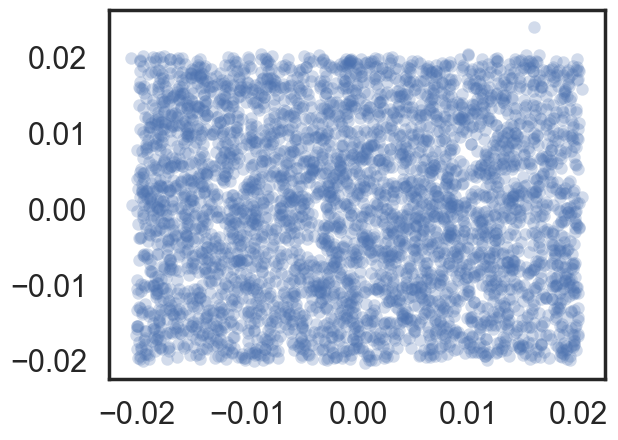

In [23]:
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}
plt.scatter(rol2vector[:, 0], rol2vector[:, 1], c='b', **plot_kwds)
# Ejemplo con Blobs:
# plt.scatter(blobs[:, 0], blobs[:, 1], c='b', **plot_kwds)


In [25]:
# clusterer = hdbscan.HDBSCAN( metric='')   # metric='euclidean', l2, p
clusterer.fit_predict(rol2vec.wv.vectors)

# Ejemplo con Blobs:
# clusterer.fit_predict(blobs)


# pd.crosstab(clusterer.labels_, columns='count', values=clusterer.labels_, index=clusterer.labels_)
pd.crosstab(clusterer.labels_, columns='count', colnames=['cluster'], rownames=['label'], margins=True, margins_name='Total', dropna=True, 
            normalize=False, )

cluster,count,Total
label,,
-1,4012,4012
0,5,5
1,6,6
2,5,5
3,14,14
4,11,11
Total,4053,4053


In [26]:
pd.crosstab(clusterer.labels_, columns='count')

col_0,count
row_0,
-1,4012
0,5
1,6
2,5
3,14
4,11


In [28]:
clusterer.probabilities_

array([0., 0., 0., ..., 0., 0., 0.])

<Axes: ylabel='$\\lambda$ value'>

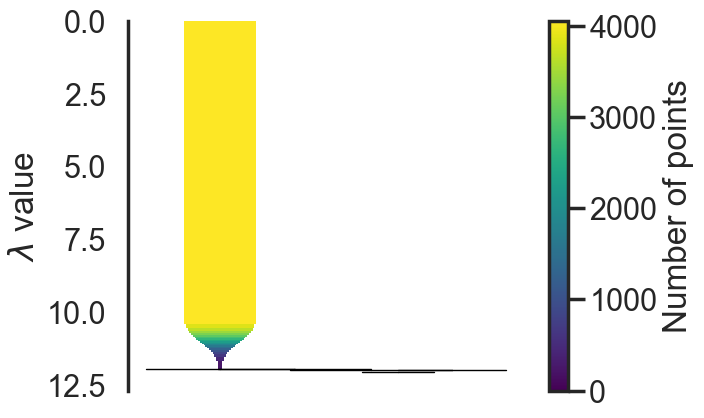

In [29]:
clusterer.condensed_tree_.plot()

<Axes: ylabel='$\\lambda$ value'>

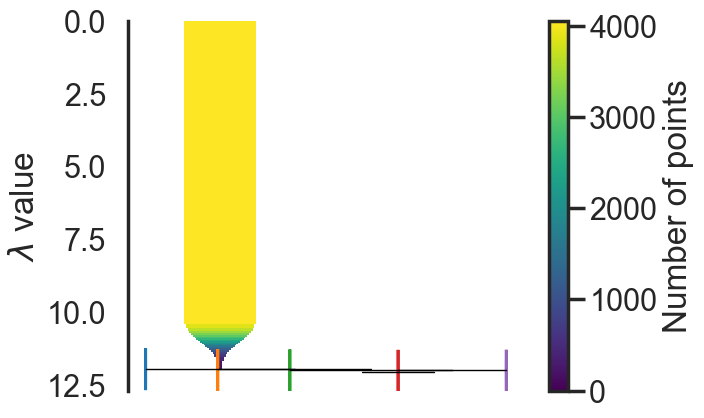

In [30]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

In [34]:
#Ejemplo con Blobs:

# %matplotlib inline  
# plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

# plt.scatter(blobs[:, 0], blobs[:, 1], c=clusterer.labels_, **plot_kwds)

<Axes: >

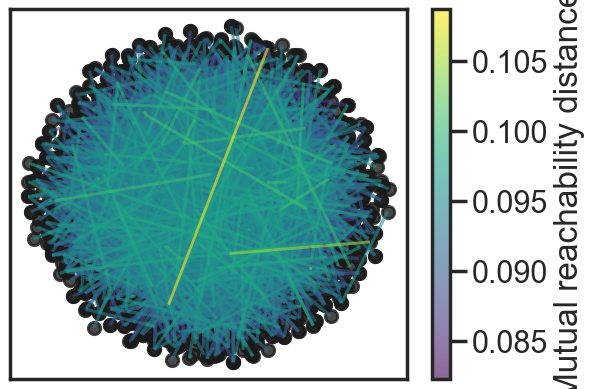

In [ ]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', edge_alpha=0.6, node_size=80, edge_linewidth=2)